In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Bagging
* Perform random sampling on the training set.
* Train multiple models (e.g. Decision Tree) on randomly sampled training set.
* Predict on all the models and ensemble the results.

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, # 500 trees
                           max_samples=100, # max sampled training set size
                           bootstrap=True, # We need drawn with replacement
                           n_jobs=-1, # Use all CPUs
                           random_state=42)

In [6]:
from sklearn.metrics import accuracy_score
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

Compare the results when no bagging is applied

In [7]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.856

### See decision boundary

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y,axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour =True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,cmap = custom_cmap,alpha=0.3)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap = custom_cmap2,alpha=0.8)
    plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha = 0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha = 0.6)
    plt.axis(axes)
    plt.xlabel('x1')
    plt.xlabel('x2')

Text(0.5, 1.0, 'Decision Tree With Bagging')

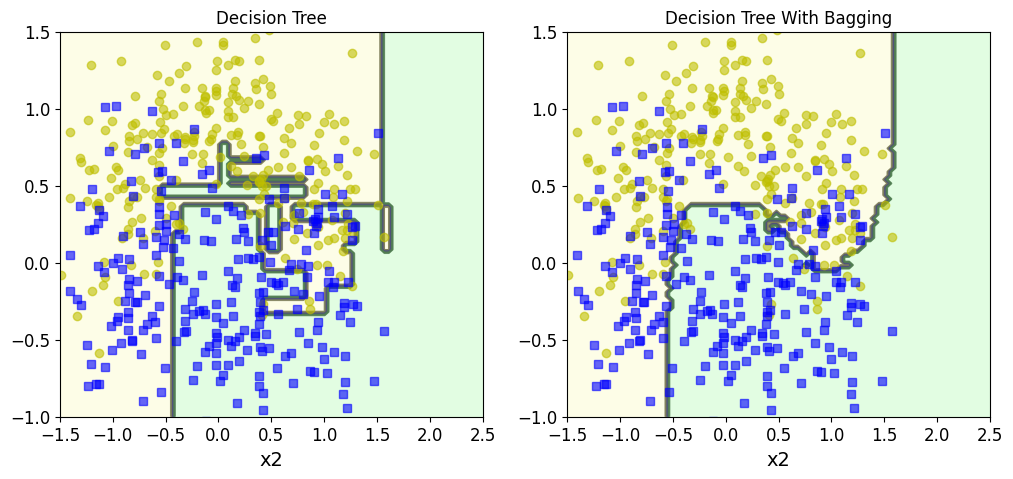

In [9]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)
plt.title('Decision Tree')
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title('Decision Tree With Bagging')

## Out-of-bag (OOB)
A cross-validation strategy by using the data that is not selected into the bagging model as the validation set.

In [10]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                  n_estimators = 500,
                  max_samples = 100,
                  bootstrap = True,
                  n_jobs = -1,
                  random_state = 42,
                  oob_score = True)

In [11]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9253333333333333

In [12]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

## Application of bagging: random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

### Use random forest in iris dataset


In [16]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500,
                                n_jobs=-1)
rf_clf.fit(iris['data'],iris['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [17]:
# Show feature importance
for name, score in zip(iris['feature_names'], rf_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10644724232716897
sepal width (cm) 0.020861669265351875
petal length (cm) 0.43846936696198374
petal width (cm) 0.43422172144549553


### Using MNIST data

In [19]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset using fetch_openml
mnist = fetch_openml(name='mnist_784', version=1)

In [20]:
rf_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

sklearn uses the average depth of a feature to determine the feature importance.

In [21]:
rf_clf.feature_importances_.shape

(784,)

Now we use a heatmap to show feature importance

In [22]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.hot)
    plt.axis('off')

[Text(1, 0.0, 'Not important'),
 Text(1, 0.009399654111707359, 'Very important')]

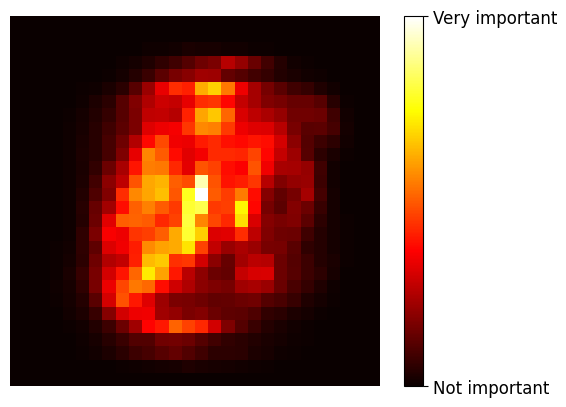

In [23]:
plot_digit(rf_clf.feature_importances_)
char = plt.colorbar(ticks=[rf_clf.feature_importances_.min(),
                           rf_clf.feature_importances_.max()])
char.ax.set_yticklabels(['Not important','Very important'])